In [30]:
!git clone https://github.com/nuttachot/ai101.git

fatal: destination path 'ai101' already exists and is not an empty directory.


In [31]:
pwd

'/Users/nuttachot/Library/CloudStorage/iCloud Drive/Documents/CPSU-Course/DS_docker_101/notebooks/กระทรวง'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
df = pd.read_csv('THB.csv')

In [5]:
df.head()

,Date,Close,Open,High,Low,Change
0,"Nov 23, 2018",33.08,32.98,33.137,32.95,0.30%
1,"Nov 22, 2018",32.98,32.90,33.030,32.87,0.27%
2,"Nov 21, 2018",32.89,32.97,33.040,32.85,-0.30%
3,"Nov 20, 2018",32.99,32.94,33.030,32.89,0.15%
4,"Nov 19, 2018",32.94,32.87,33.060,32.83,0.24%


In [6]:
df.columns.values

array(['Date', 'Close', 'Open', 'High', 'Low', 'Change'], dtype=object)

In [7]:
df.shape

(1614, 6)

In [8]:
df['Date']

0       Nov 23, 2018
1       Nov 22, 2018
2       Nov 21, 2018
3       Nov 20, 2018
4       Nov 19, 2018
5       Nov 18, 2018
6       Nov 16, 2018
7       Nov 15, 2018
8       Nov 14, 2018
9       Nov 13, 2018
10      Nov 12, 2018
11      Nov 11, 2018
12      Nov 09, 2018
13      Nov 08, 2018
14      Nov 07, 2018
15      Nov 06, 2018
16      Nov 05, 2018
17      Nov 04, 2018
18      Nov 02, 2018
19      Nov 01, 2018
20      Oct 31, 2018
21      Oct 30, 2018
22      Oct 29, 2018
23      Oct 28, 2018
24      Oct 26, 2018
25      Oct 25, 2018
26      Oct 24, 2018
27      Oct 23, 2018
28      Oct 22, 2018
29      Oct 21, 2018
            ...     
1584    Dec 04, 2012
1585    Dec 03, 2012
1586    Nov 30, 2012
1587    Nov 29, 2012
1588    Nov 28, 2012
1589    Nov 27, 2012
1590    Nov 26, 2012
1591    Nov 23, 2012
1592    Nov 22, 2012
1593    Nov 21, 2012
1594    Nov 20, 2012
1595    Nov 19, 2012
1596    Nov 16, 2012
1597    Nov 15, 2012
1598    Nov 14, 2012
1599    Nov 13, 2012
1600    Nov 1

In [9]:
df['Close'].describe()

count    1614.000000
mean       33.090666
std         1.762718
min        28.615000
25%        32.060750
50%        32.837500
75%        34.763750
max        36.500000
Name: Close, dtype: float64

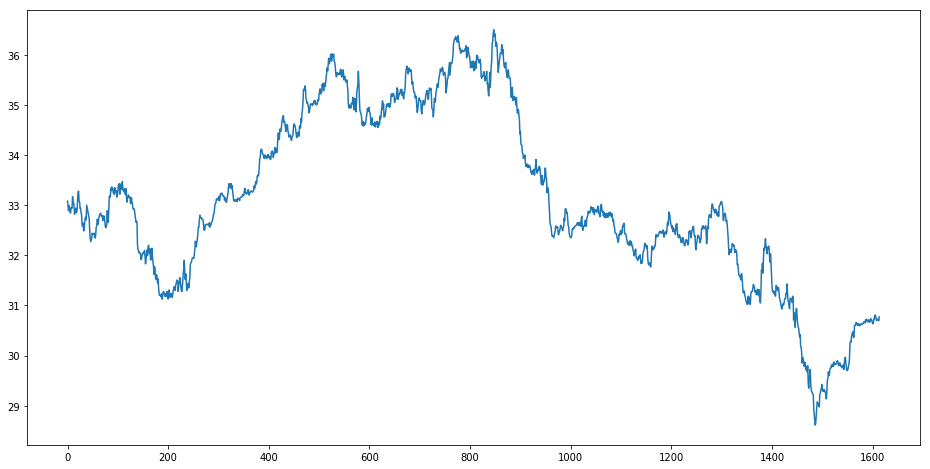

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

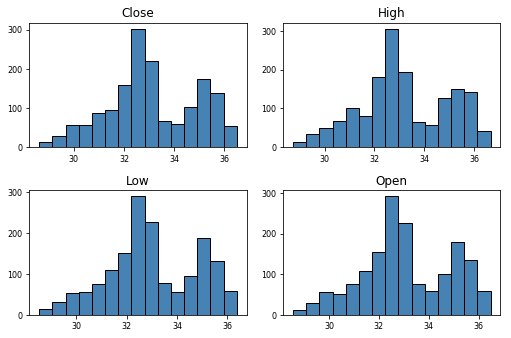

In [11]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

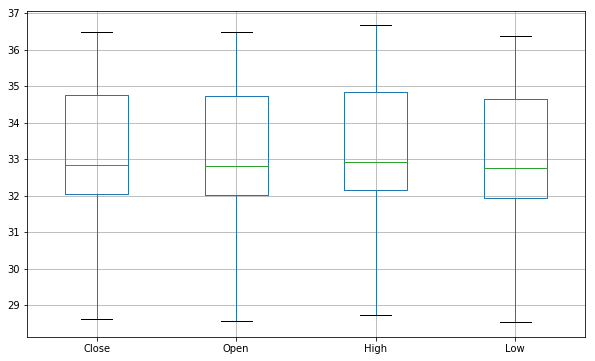

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
boxplot = df.boxplot(column=['Close', 'Open', 'High', 'Low'])

In [13]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [14]:
cut = 1292

In [15]:
train = new_data[:cut]
valid = new_data[cut:]

In [16]:
train.shape, valid.shape

((1292, 2), (322, 2))

In [17]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

('Apr 01, 2014', 'Sep 30, 2018', 'Apr 01, 2013', 'Sep 30, 2013')

In [18]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:cut,:]
valid = dataset[cut:,:]
new_data.shape, train.shape, valid.shape

((1614, 1), (1292, 1), (322, 1))

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
#print(dataset[0:60,0])

scaled_data = scaler.fit_transform(dataset)
#print(scaled_data[0:60,0])

/Users/nuttachot/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
x_train, y_train = [], []
for i in range(3,len(train)):
    x_train.append(scaled_data[i-3:i,0])
    y = []
    y.append(scaled_data[i,0])
   
    y_train.append(y)

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1289, 3)

In [22]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout

Using TensorFlow backend.


In [23]:
# define model

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1))

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# fit model
model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=1, shuffle=True)

Epoch 1/10
1289/1289 [==============================] - 2s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2/10
1289/1289 [==============================] - 2s 1ms/step - loss: 2.8278e-04 - mean_squared_error: 2.8278e-04
Epoch 3/10
1289/1289 [==============================] - 2s 1ms/step - loss: 3.0880e-04 - mean_squared_error: 3.0880e-04
Epoch 4/10
1289/1289 [==============================] - 2s 1ms/step - loss: 3.0192e-04 - mean_squared_error: 3.0192e-04
Epoch 5/10
1289/1289 [==============================] - 2s 1ms/step - loss: 2.8031e-04 - mean_squared_error: 2.8031e-04
Epoch 6/10
1289/1289 [==============================] - 2s 1ms/step - loss: 2.8250e-04 - mean_squared_error: 2.8250e-04
Epoch 7/10
1289/1289 [==============================] - 2s 1ms/step - loss: 2.7319e-04 - mean_squared_error: 2.7319e-04
Epoch 8/10
1289/1289 [==============================] - 2s 1ms/step - loss: 2.6566e-04 - mean_squared_error: 2.6566e-04
Epoch 9/10
1289/1289 [==========================

In [25]:
inputs = new_data[len(new_data) - len(valid) - 3:].values
inputs  = scaler.transform(inputs)
inputs.shape

(325, 1)

In [26]:
X_test = []
for i in range(3,inputs.shape[0]):
    X_test.append(inputs[i-3:i,0])
X_test = np.array(X_test)

In [27]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [28]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.11261907073902241

/Users/nuttachot/miniconda3/envs/AI/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


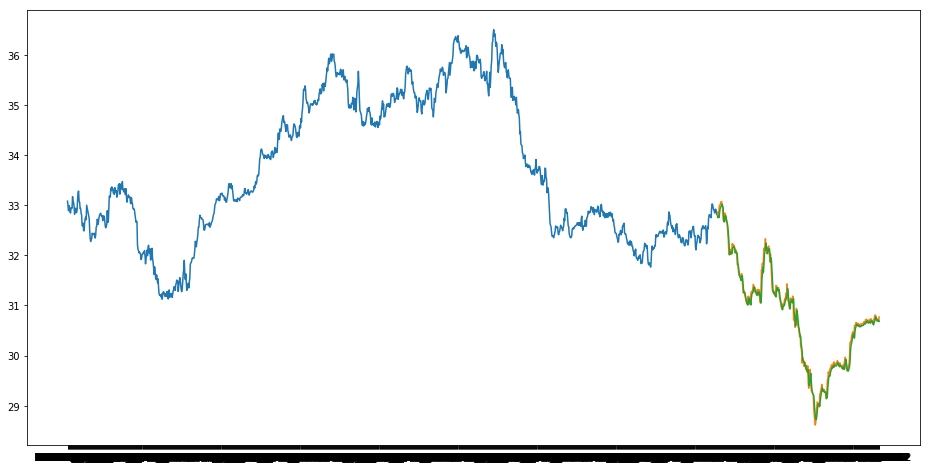

In [29]:
train = new_data[:cut]
valid = new_data[cut:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['Close'],)
plt.plot(valid[['Close','Predictions']])